In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools
import sys
import random

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [3]:
CC_df= pd.read_csv('UCI_Credit_Card.csv')

In [4]:
CC_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
CC_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [6]:
CC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
CC_df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default.payment.next.month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default.payment.next.month      0.00       0.0       0.00        1.0

In [8]:
CC_df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [119]:
CC_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

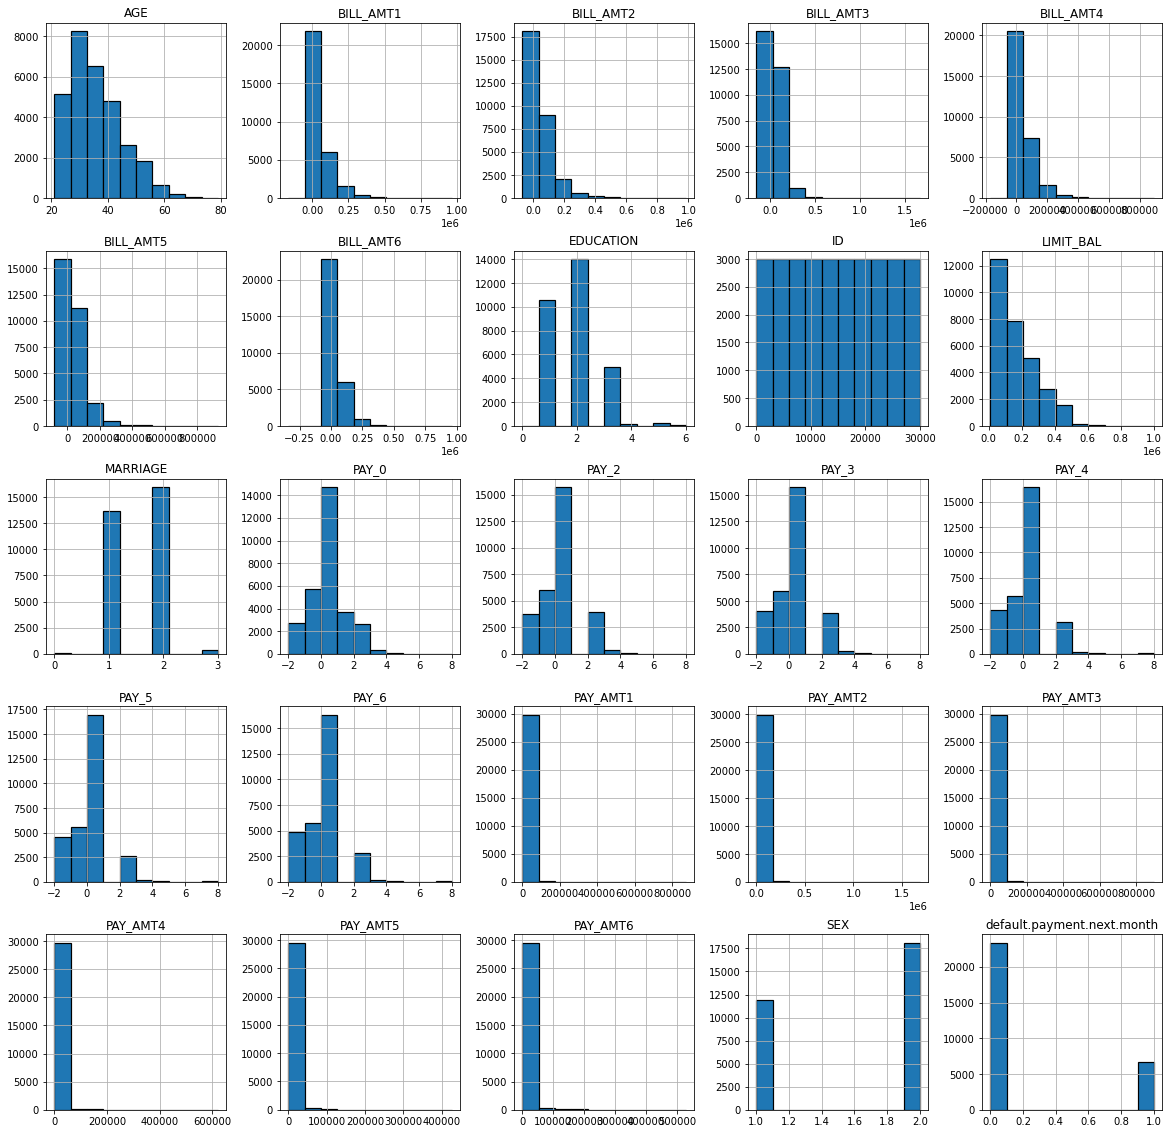

In [10]:
CC_df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [47]:
#add feature. Find the % of payment made of the total bill amount
CC_df['Per_AMT_PAID']=round(((CC_df['PAY_AMT1']+ CC_df['PAY_AMT2']+CC_df['PAY_AMT3']+CC_df['PAY_AMT4']+CC_df['PAY_AMT5']+CC_df['PAY_AMT6'])/(CC_df['BILL_AMT1']+ CC_df['BILL_AMT2']+CC_df['BILL_AMT3']+CC_df['BILL_AMT4']+CC_df['BILL_AMT5']+CC_df['BILL_AMT6'])),4)

In [10]:
CCplot_df=CC_df.drop(['ID'],axis=1)
CCplot_df.head(5)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0     -2  ...        0.0        0.0       0.0     689.0       0.0       0.0   
1      0  ...     3455.0     3261.0       0.0    1000.0    1000.0    1000.0   
2      0  ...    14948.0    15549.0    1518.0    1500.0    1000.0    1000.0   
3      0  ...    28959.0    29547.0    2000.0    2019.0    1200.0    1100.0   
4      0  ...    19146.0    19131.0    2000.0   36681.0   10000.0    9000.0   

   PAY_AMT5  PAY_AMT6  default.payment.next.month  Per_AMT_PAID  
0       0.0       0.0                           1        0.0894  
1       0.0    2000.0                           1        0.2928  
2    1000.0    5000.0                           0        0.1084  
3    1069.0    1000.0                           0        0.0363  
4     689.0     679.0                           0        0.5401  

[5 rows x 25 columns]

In [71]:
#Impute inf with 0
CC_df['Per_AMT_PAID']=CC_df['Per_AMT_PAID'].replace(np.inf,0)
print(CC_df.Per_AMT_PAID.value_counts())
CCplot_df=CC_df.drop(['ID'],axis=1)

0.0000    1508
1.0000     609
0.0371      72
0.0388      72
0.0386      69
          ... 
0.2894       1
1.4578       1
0.9965       1
1.1824       1
1.8339       1
Name: Per_AMT_PAID, Length: 9212, dtype: int64


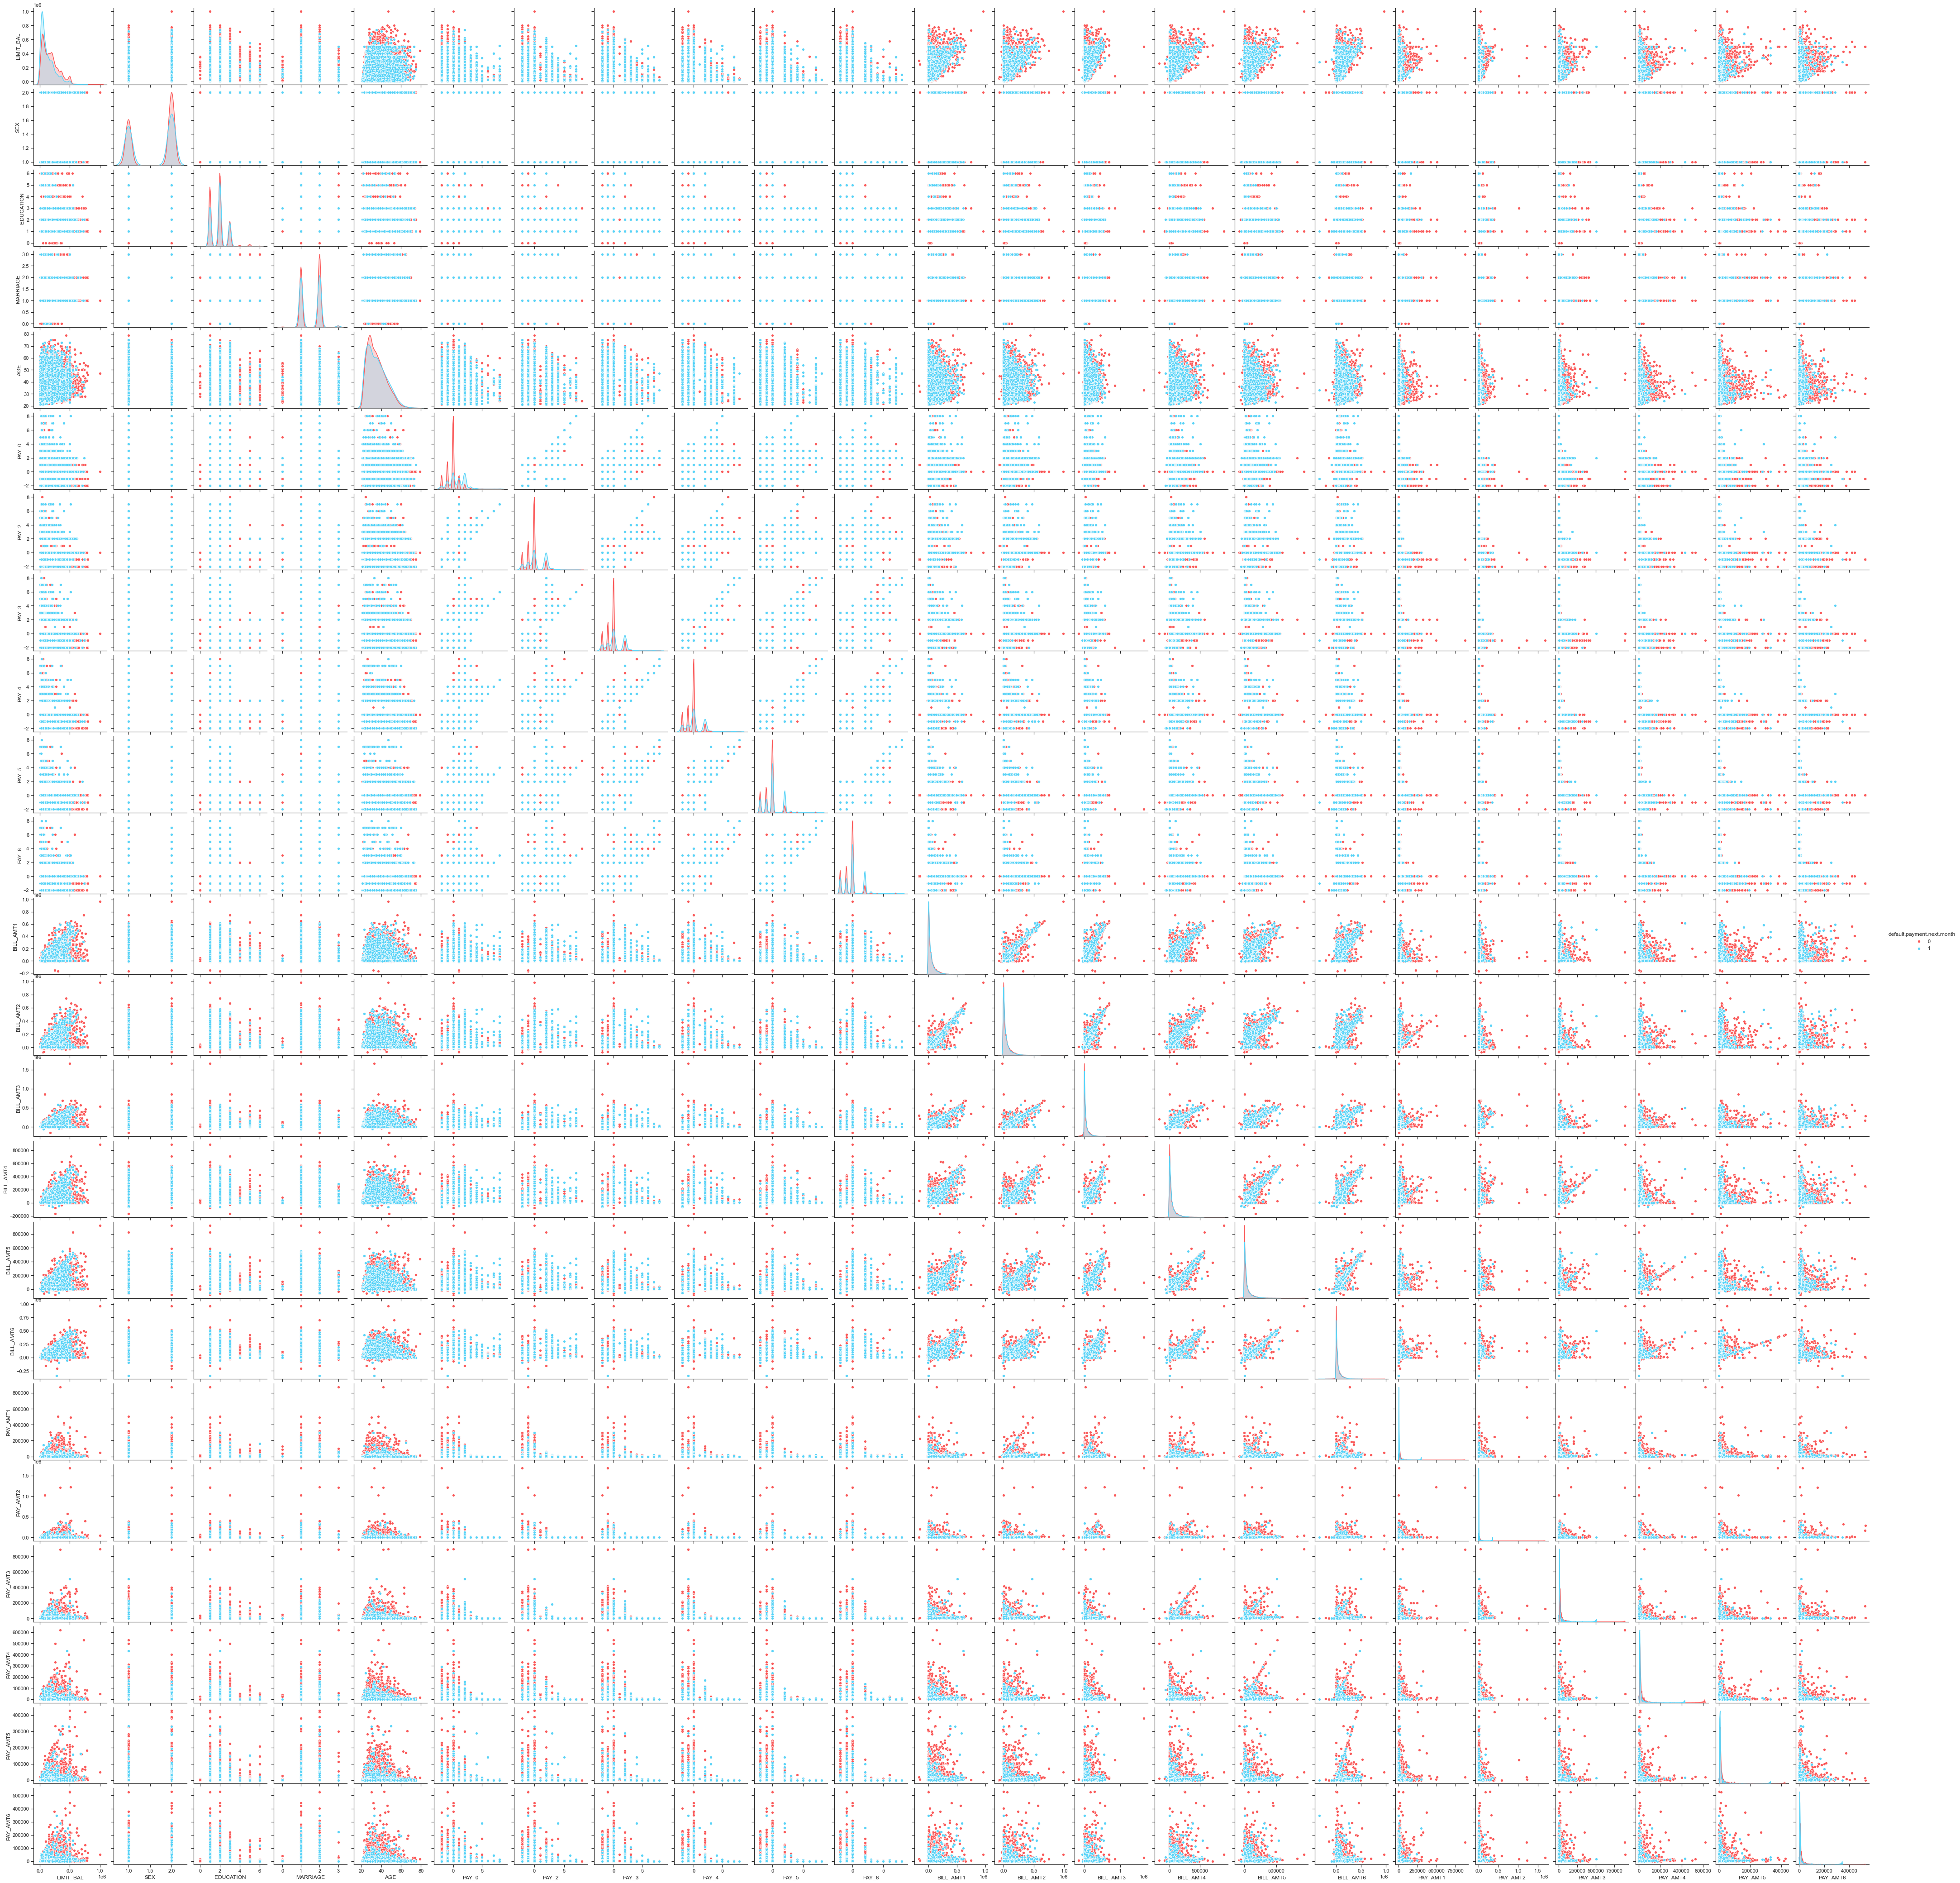

In [20]:
fig, ax = plt.subplots(figsize = (15,10))
CCplot_df=CC_df.drop(['ID'],axis=1)
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]
sns.pairplot(CCplot_df,hue='default.payment.next.month', palette=pal)

In [96]:
print(CCplot_df.shape)
print(CCplot_df.columns[0])
print(CCplot_df.isnull().sum())

(30000, 25)
LIMIT_BAL
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
Per_AMT_PAID                  0
dtype: int64


ValueError: supplied range of [-546.9285714285714, inf] is not finite

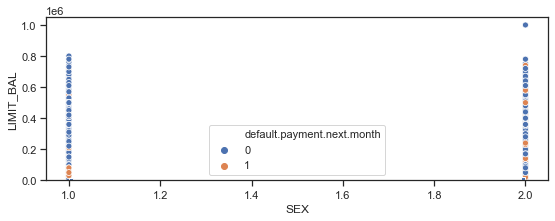

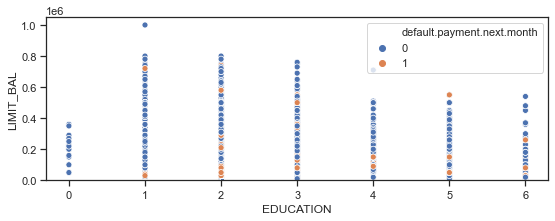

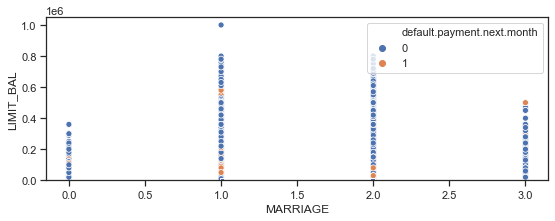

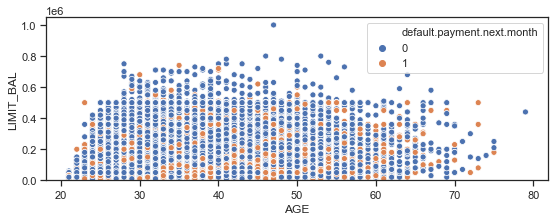

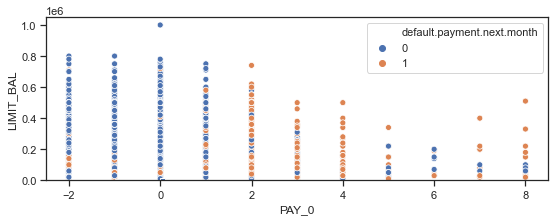

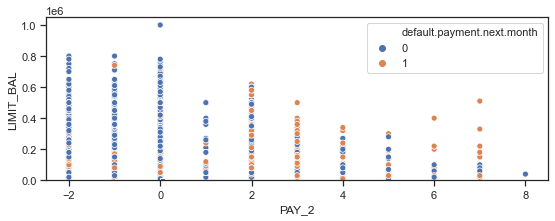

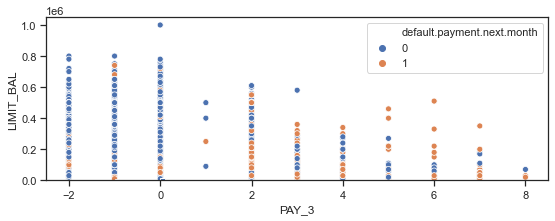

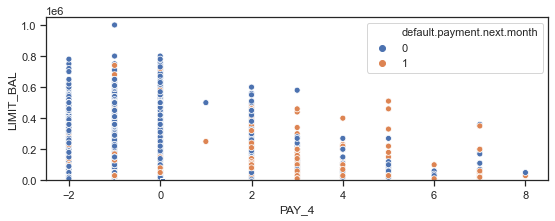

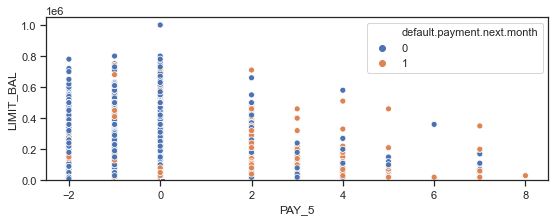

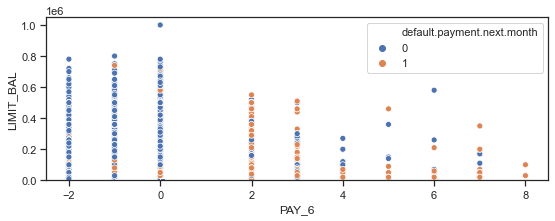

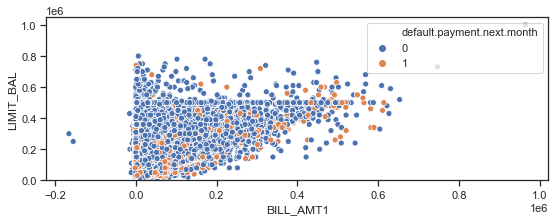

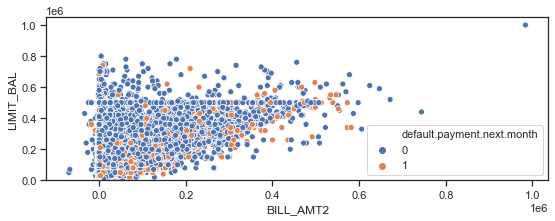

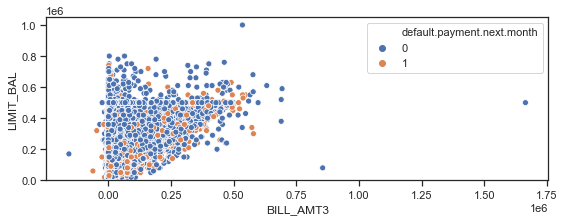

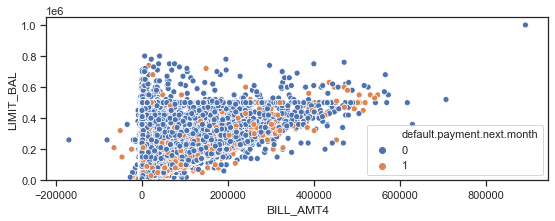

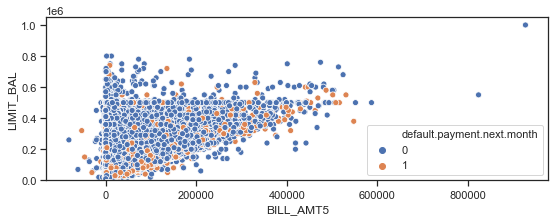

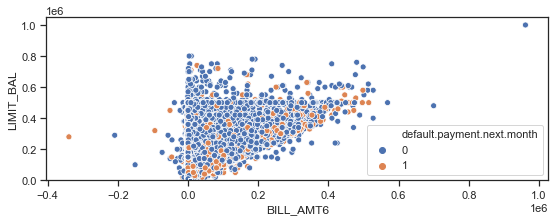

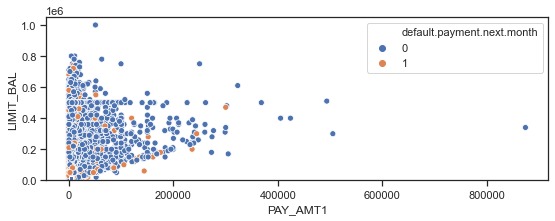

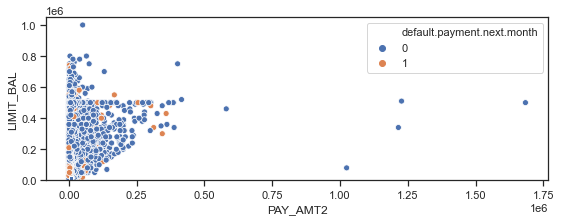

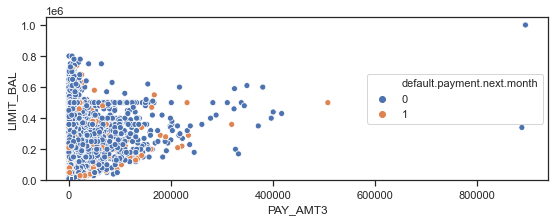

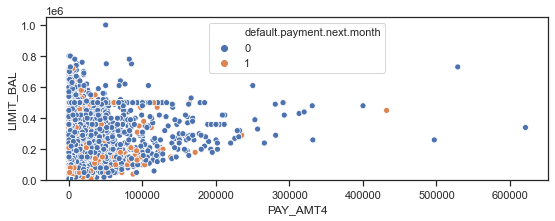

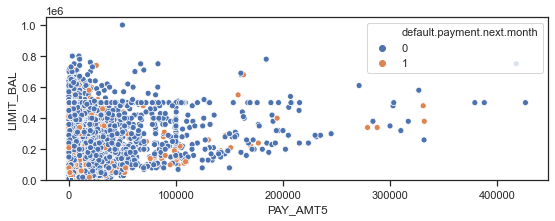

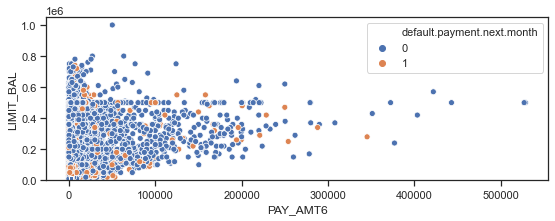

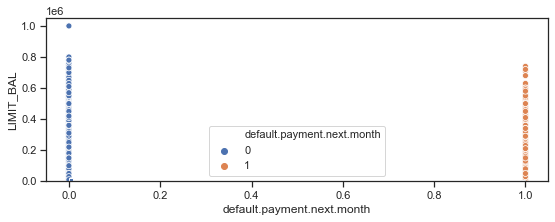

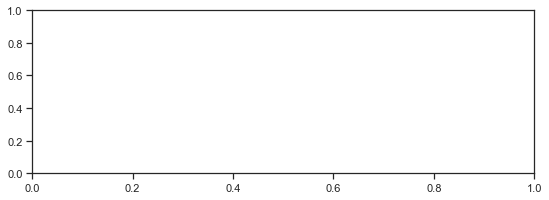

In [53]:
def plot_scatter(variable):
    plt.figure(figsize = (9,3))
    plt.hist(CCplot_df[variable], bins=100)
    plt.xlabel(variable)
    plt.ylabel("LIMIT_BAL")
    sns.scatterplot(x= variable,y=CCplot_df['LIMIT_BAL'],data=CCplot_df, hue= 'default.payment.next.month')
    #plt.show()
   
numericVar = CCplot_df.drop(['LIMIT_BAL'],axis=1)
for n in numericVar:
    plot_scatter(n)

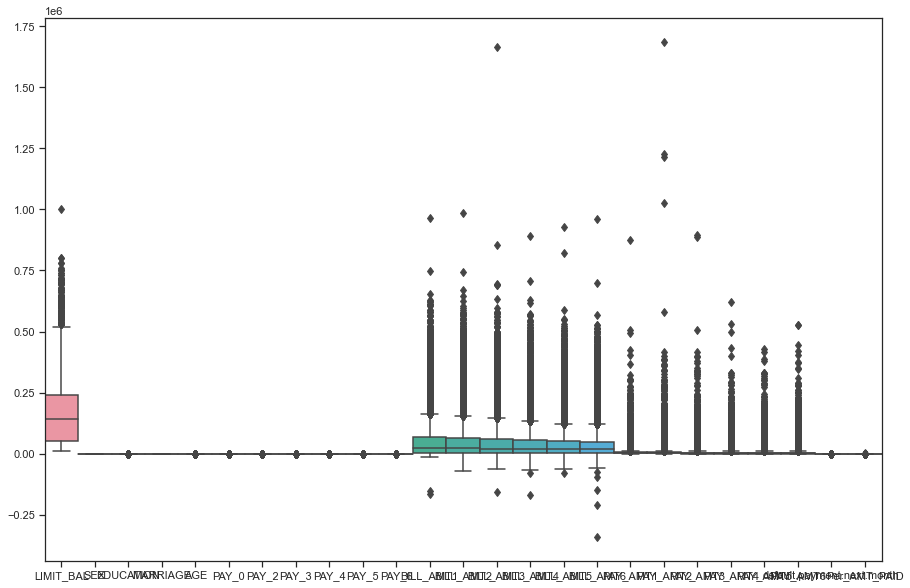

In [54]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = CCplot_df,width=1,ax=ax,fliersize=6)

In [56]:
CC_df['LIMIT_BAL'].index

RangeIndex(start=0, stop=30000, step=1)

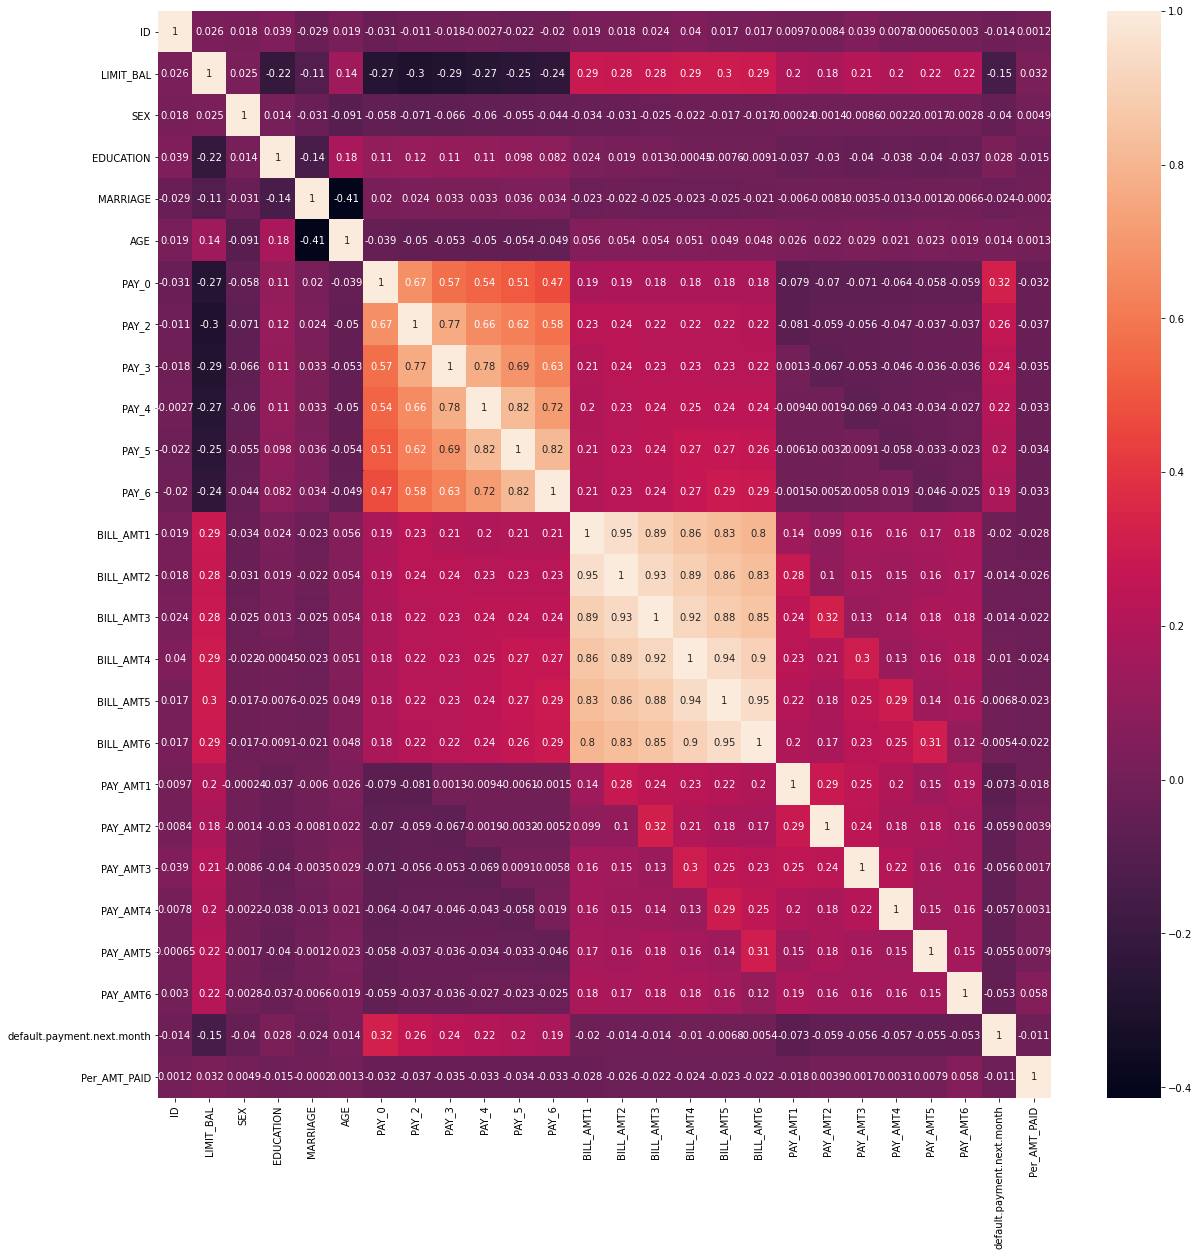

In [14]:
correlations = CC_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [88]:
# create the regression model. Defin x and Y
X = CCplot_df.loc[:, CCplot_df.columns != 'default.payment.next.month']
y = CCplot_df.loc[:, CCplot_df.columns == 'default.payment.next.month']

def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=12)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:Scaling is required to ensure that influence of each column on the output is comparable to each other. 
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)

In [73]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

In [91]:
#Run the model again with new X train scaled data
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.810
Test set score: 0.811


In [61]:
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.647784
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.228    
Dependent Variable: y                AIC:              27256.9163
Date:               2021-05-02 11:38 BIC:              27455.7232
No. Observations:   21000            Log-Likelihood:   -13603.   
Df Model:           24               LL-Null:          -11076.   
Df Residuals:       20975            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        -0.0003     0.0145   -0.0233   0.9814   -0.0288    0.0282
x2        -0.0377     0.0183   -2.0639   0.0390   -0.0735 

In [114]:
X.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Per_AMT_PAID  
0       0.0       0.0       0.0        0.0894  
1    1000.0       0.0    2000.0        0.2928  
2    1000.0    1000.0    5000.0        0.1084  
3    1100.0    1069.0    1000.0        0.0363  
4    9000.0     689.0     679.0        0.5401  

[5 rows x 24 columns]

In [122]:
X_train.head(5)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
24234   220000.0    1          2         2   31      0      0      0      0   
24289   190000.0    1          1         2   30      0      0      0      0   
10987   230000.0    2          2         2   35     -1     -1      2     -1   
15259    50000.0    2          2         2   35      0      0      0      0   
8535    250000.0    1          2         1   29      1     -2     -2     -1   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
24234     -2  ...        0.0        0.0        0.0    3000.0    1000.0   
24289      0  ...   148760.0    48776.0    49853.0    4555.0    5058.0   
10987     -1  ...     1333.0      168.0      140.0    1689.0       0.0   
15259      0  ...    34688.0    24124.0    21072.0    2000.0    2000.0   
8535      -1  ...      746.0     7146.0      434.0       0.0       0.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Per_AMT_PAID  
24234       0.0       0.0       0.0       0.0        0.0340  
24289    6489.0    1602.0    1716.0    2286.0        0.0323  
10987    1333.0     168.0     140.0       0.0        0.0978  
15259    1900.0    1032.0    3000.0     907.0        0.0484  
8535      770.0    7200.0     688.0       0.0        1.0489  

[5 rows x 24 columns]

In [75]:
y_pred_train = logreg_result.predict(X_train_scaled)
y_pred_test = logreg_result.predict(X_test_scaled)

print(classification_report(y_pred_test, y_test))
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8355
           1       0.24      0.74      0.36       645

    accuracy                           0.81      9000
   macro avg       0.61      0.78      0.62      9000
weighted avg       0.92      0.81      0.85      9000

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     19481
           1       0.23      0.71      0.35      1519

    accuracy                           0.81     21000
   macro avg       0.60      0.76      0.62     21000
weighted avg       0.92      0.81      0.85     21000



In [ ]:
#Try decision tree newApp_df

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import make_scorer

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True):
    if train:
        pred = clf.predict(X_train_scaled)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_scaled)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [66]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=84)
tree_clf.fit(X_train_scaled, y_train)

print_score(tree_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(tree_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    16371.0  4629.0       1.0    21000.0       21000.0
_______________________________________________
Confusion Matrix: 
 [[16371     0]
 [    0  4629]]

Test Result:
Accuracy Score: 72.43%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.831570     0.392077  0.724333     0.611823      0.733563
recall        0.809095     0.428999  0.724333     0.619047      0.724333
f1-score      0.820178     0.409707  0.724333     0.614943      0.728643
support    6993.000000  2007.000000  0.724333  9000.000000   9000.000000
_________

In [77]:
#Try Random forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=5)
rf_clf.fit(X_train_scaled, y_train)

print_score(rf_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(rf_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 97.22%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.974455     0.963557   0.97219      0.969006      0.972052
recall         0.990288     0.908188   0.97219      0.949238      0.972190
f1-score       0.982307     0.935053   0.97219      0.958680      0.971891
support    16371.000000  4629.000000   0.97219  21000.000000  21000.000000
_______________________________________________
Confusion Matrix: 
 [[16212   159]
 [  425  4204]]

Test Result:
Accuracy Score: 78.42%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.831648     0.523466  0.784222     0.677557      0.762923
recall        0.905620     0.361236  0.784222     0.633428      0.784222
f1-score      0.867059     0.427476  0.784222     0.647268      0.769032
support    6993.00

In [99]:
df_train = X_train.join(y_train)

AttributeError: 'numpy.int64' object has no attribute 'index'

In [95]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train[df_train['default.payment.next.month']==0]
df_minority = df_train[df_train['default.payment.next.month']==1]

print(df_majority.def_pay.count())
print("-----------")
print(df_minority.def_pay.count())
print("-----------")
print(df_train.def_pay.value_counts())

NameError: name 'df_train' is not defined